In [ ]:
# General imports to be able to go through our data
import pandas as pd

In [3]:
# Create our data frame and load in the data
df = pd.read_csv('../data/CTA_Ridership.csv')

df.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,02/01/2010,W,1091041,648428,1739469
1,07/15/2006,A,603018,412144,1015162
2,08/26/2017,A,487453,446049,933502
3,12/25/2007,U,249699,111582,361281
4,07/08/2005,W,950222,591325,1541547


In [ ]:
# Lets clean the dataset up and format our columns.

# Format service date into a data time format.
df['service_date'] = pd.to_datetime(df['service_date'], format = "%m/%d/%Y")
df = df.sort_values(by = 'service_date')

# Create separate colums based on year, month, and weekday
df['year'] = df['service_date'].dt.year
df['month'] = df['service_date'].dt.month
df['weekday'] = df['service_date'].dt.day_name()

# Lets see our glorious data!
df.head()


,service_date,day_type,bus,rail_boardings,total_rides,year,month,weekday
1195,2001-01-01,U,297192,126455,423647,2001,1,Monday
7906,2001-01-02,W,780827,501952,1282779,2001,1,Tuesday
6604,2001-01-03,W,824923,536432,1361355,2001,1,Wednesday
6528,2001-01-04,W,870021,550011,1420032,2001,1,Thursday
5067,2001-01-05,W,890426,557917,1448343,2001,1,Friday


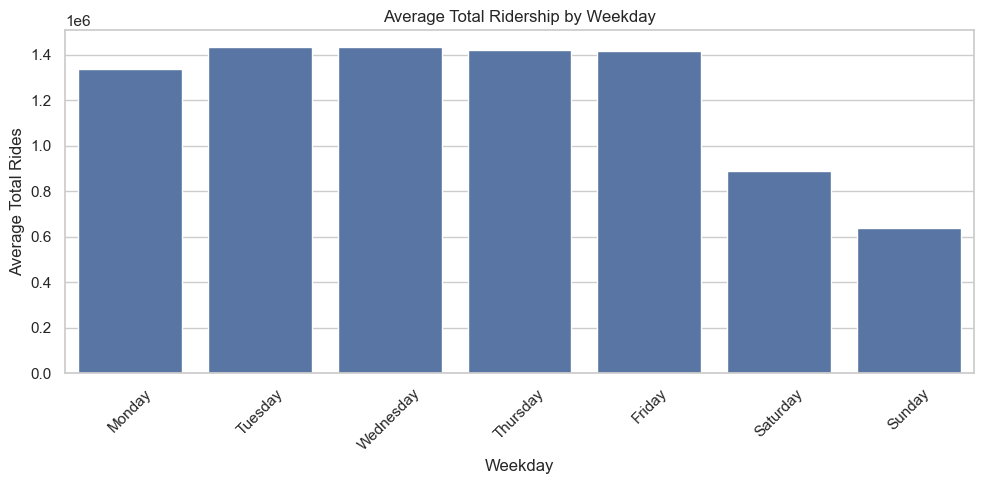

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid")

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df.groupby('weekday')['total_rides'].mean().reindex(weekday_order)

plt.figure(figsize = (10,5))
sns.barplot(x = weekday_avg.index, y = weekday_avg.values)
plt.title("Average Total Ridership by Weekday")
plt.ylabel("Average Total Rides")
plt.xlabel("Weekday")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

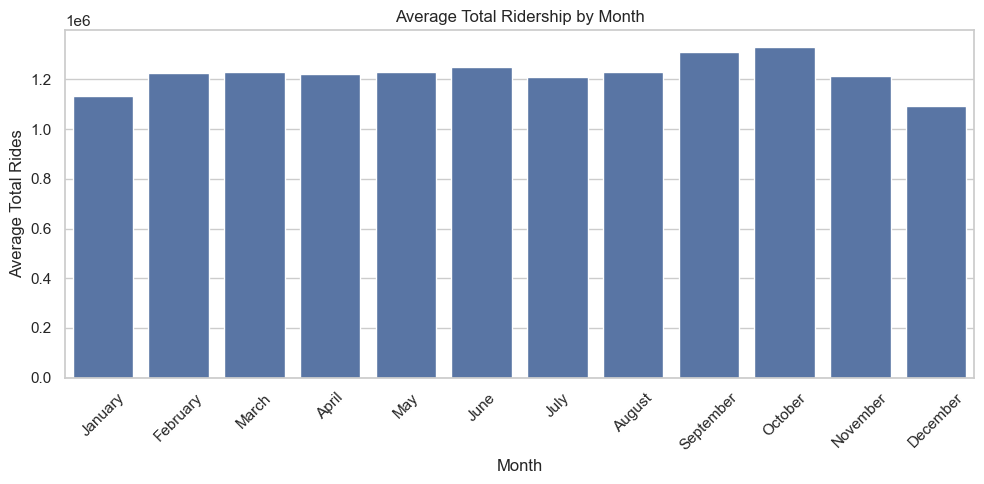

In [ ]:
import calendar
monthly_avg = df.groupby('month')['total_rides'].mean()

# Replace the numbers with the actual month names 
monthly_avg.index = [calendar.month_name[m] for m in monthly_avg.index]

plt.figure(figsize = (10,5))
sns.barplot(x = monthly_avg.index, y = monthly_avg.values)
plt.title("Average Total Ridership by Month")
plt.xlabel("Month")
plt.ylabel("Average Total Rides")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

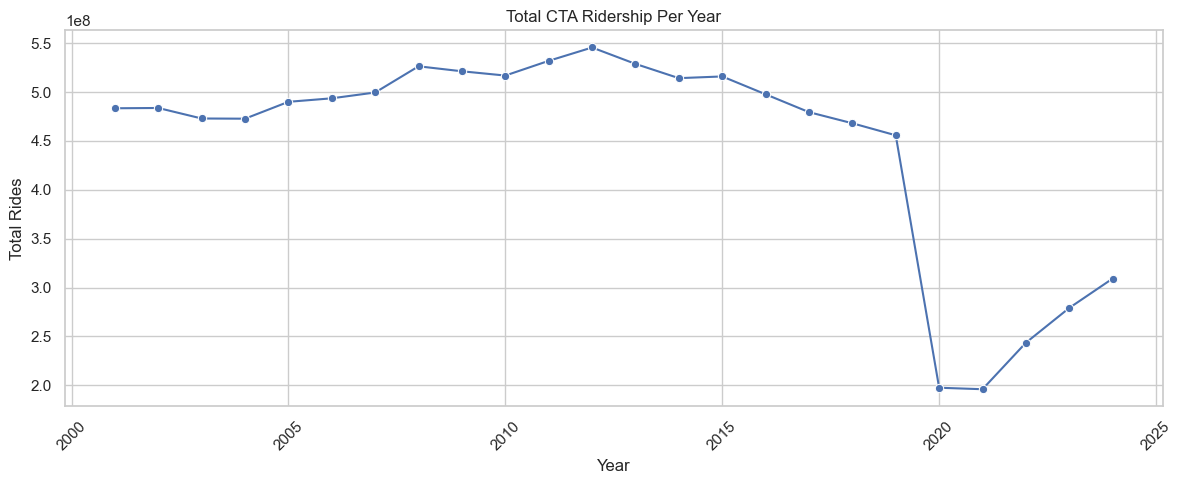

In [24]:
yearly_total = df.groupby('year')['total_rides'].sum()

plt.figure(figsize = (12,5))
sns.lineplot(x = yearly_total.index, y = yearly_total.values, marker = "o")
plt.title("Total CTA Ridership Per Year")
plt.ylabel("Total Rides")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()